<a href="https://colab.research.google.com/github/vaniasahdaa/skripsi/blob/main/scen3_coding_6040_10fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Module

In [1]:
import pandas as pd
import numpy as np
import string
import re

## Read CSV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
telegram_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/scen3_telegram_review_labelled.csv')
print(telegram_review)
telegram_review.head()

                    date           userName  rating  \
0    2023-07-31 17:14:15              &-&9-       1   
1     2023-07-31 8:34:34      Rohmatadis354       5   
2     2023-07-31 7:53:11           tiririis       3   
3     2023-07-31 3:23:24             Ova ok       5   
4     2023-07-31 3:22:17  Fransiskus_Solano       5   
..                   ...                ...     ...   
327  2022-08-31 19:30:57  Mantan Orang Kaya       5   
328  2022-08-15 13:40:55            sjjdheh       5   
329   2022-07-15 2:34:14           wonberry       5   
330  2022-07-13 15:43:27      ahakdkalapwjd       5   
331   2022-07-12 8:07:27          j03hanafi       4   

                                                review  \
0    jujur sangat kecewa banget pernah download trs...   
1                                            Very good   
2    maaf min mau tanya saya mau log in telegram ta...   
3                                            Very Good   
4                                            Very

,date,userName,rating,review,title,Natan,Grace,Vania,Final
0,2023-07-31 17:14:15,&-&9-,1,jujur sangat kecewa banget pernah download trs...,kecewa,Negatif,Negatif,Negatif,Negatif
1,2023-07-31 8:34:34,Rohmatadis354,5,Very good,Very good,Positif,Positif,Positif,Positif
2,2023-07-31 7:53:11,tiririis,3,maaf min mau tanya saya mau log in telegram ta...,trouble,Negatif,Negatif,Negatif,Negatif
3,2023-07-31 3:23:24,Ova ok,5,Very Good,Evaluation,Positif,Positif,Positif,Positif
4,2023-07-31 3:22:17,Fransiskus_Solano,5,Very good,Telegram,Positif,Positif,Positif,Positif


## Mengurangi Kolom

In [4]:
telegram_review.drop(columns = ['date', 'userName', 'title', 'Natan', 'Grace', 'Vania'], inplace = True)
telegram_review.columns = ['rating', 'review','Final']
telegram_review.head()

,rating,review,Final
0,1,jujur sangat kecewa banget pernah download trs...,Negatif
1,5,Very good,Positif
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif
3,5,Very Good,Positif
4,5,Very good,Positif


In [5]:
review = telegram_review['review']

## Install Library Demoji - Untuk Menghapus Emoji

In [6]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 828.8 kB/s eta 0:00:00


In [7]:
import demoji
demoji.download_codes()

<ipython-input-7-eb011a9810ad>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


## Case Folding

In [8]:
def case_folding(text):
    #Mengubah uppercase menjadi lowercase
    text = text.lower()
    #Menghilangkan tanda baca
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    #Menghapus angka
    text = re.sub(r'\d', ' ', text)
    #Menghapus pangkat pada kalimat
    text = ''.join([i for i in text if ord(i) < 128])
    #Mengganti line baru dengan spasi
    text = re.sub("\n", " ", text)
    #Menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    #Menghapus symbol
    symbol_pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(symbol_pattern, '', text)
    #Menghapus spasi di awal dan akhir kalimat
    text = text.strip()
    #Menghapus spasi berlebih
    text = re.sub('\s+', ' ', text)
    #Menghapus Emoji
    text = demoji.replace(text, ' ')
    return text

## Menampilkan Data yang Sudah di Case Folding

In [9]:
telegram_review['clean'] = [case_folding(i) for i in review]
review = telegram_review['clean']
telegram_review.head(150)

,rating,review,Final,clean
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...
1,5,Very good,Positif,very good
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good
4,5,Very good,Positif,very good
...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...
148,1,Lemot,Negatif,lemot


## Translasi Data

### Install Translator

In [10]:
pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 649.7 kB/s eta 0:00:00


### Translasi

In [11]:
from deep_translator import GoogleTranslator
# Define a function to translate text
def translate_text(text, target_language='id'):
    translated = GoogleTranslator(source='auto', target=target_language).translate(text)
    return translated

### Menampilkan Hasil Translasi

In [12]:
# Apply the translation function to the 'review' column
telegram_review['translated_review'] = telegram_review['clean'].apply(translate_text)
# Print the translated reviews
review = telegram_review['translated_review']

telegram_review.head(150)

,rating,review,Final,clean,translated_review
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa banget pernah download trs...
1,5,Very good,Positif,very good,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus
4,5,Very good,Positif,very good,sangat bagus
...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,Tolong diperbaiki kalau tiba-tiba ingin keluar...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku dn...
148,1,Lemot,Negatif,lemot,lemot


## Formalisasi Data

In [13]:
# Membaca dataset dari dua file dataset
dataset = eval(open("/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/combined_slang_words.txt").read())

# Create a regular expression pattern to match keys from the dataset
pattern = re.compile(r'\b(' + '|'.join(dataset.keys()) + r')\b')

#print(pattern)

# Initialize an empty list to store the transformed words
content = telegram_review['translated_review']

# Iterate through each word in the input text
j = 0
for i in content:
    filter_data = pattern.sub(lambda x: dataset[x.group()], i)
    content[j] = filter_data.lower()
    j+=1

# Return the transformed text as a list of words
 #return content

<ipython-input-13-236c7adf5d87>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content[j] = filter_data.lower()


In [14]:
print(content)

0      jujur sangat kecewa sekali pernah download ter...
1                                           sangat bagus
2      maaf min mau tanya saya mau log in telegram ta...
3                                           sangat bagus
4                                           sangat bagus
                             ...                        
327    canggih, keren dan fitur-fitur yang tidak ada ...
328    ingin mengucapkan terima kasih kepada pendiri ...
329        uda paling bner gausah ditambahin fitur story
330    lihat di tiktok kalau foundernya ga mengambil ...
331                                           keren kali
Name: translated_review, Length: 332, dtype: object


## Menampilkan Hasil Formalisasi

In [15]:
telegram_review['formalized'] = content
# review = telegram_review['formalized']

telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus
...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...
148,1,Lemot,Negatif,lemot,lambat,lambat


## Stemming

### Instal Library Sastrawi

In [16]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00


### Proses Stemming

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize the Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to perform stemming using Sastrawi
def stem_text(text):
    return stemmer.stem(text)

telegram_review['stemmed'] = telegram_review['formalized'].apply(stem_text)
review = telegram_review['stemmed']

### Menampilkan Hasil Stemming

In [18]:
telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized,stemmed
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
...,...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong baik kalau tiba ingin keluar sendiri su...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...,telah coba hubung lalu email sudah minggu dan ...
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...
148,1,Lemot,Negatif,lemot,lambat,lambat,lambat


## Stopword

### Install NTLK

In [19]:
pip install --user -U nltk

In [20]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
daftar_remove = stopwords.words('indonesian')

### Proses Stopword

In [22]:
data_neg = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/negative.txt', 'r')
neg = data_neg.read()

data_pos = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/positive.txt', 'r')
pos = data_pos.read()

data_pos_neg = pos + neg
list_pos_neg = data_pos_neg.split('\n')

final_list = list(set(daftar_remove) - set(list_pos_neg))

stopword = telegram_review['stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_list)]))

### Menampilkan Hasil Stopword

In [23]:
telegram_review['stopword'] = stopword
review = telegram_review['stopword']

telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
...,...,...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong baik kalau tiba ingin keluar sendiri su...,tolong baik keluar suka batas simpan nama duro...
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...,telah coba hubung lalu email sudah minggu dan ...,coba hubung email minggu tanggap
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku
148,1,Lemot,Negatif,lemot,lambat,lambat,lambat,lambat


In [ ]:
#telegram_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_preprocessed.csv', header=True, index=False)

## Tokenizing

## Menampilkan hasil tokenizing

In [24]:
def tokenizing(text):
    words_token = text.split()
    return words_token

In [25]:
telegram_review['token'] = [tokenizing(i) for i in review]
review = telegram_review['token']
telegram_review.head(150)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,token
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...,"[jujur, sangat, kecewa, download, download, ke..."
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...,"[maaf, min, log, in, telegram, code, accesnya,..."
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
...,...,...,...,...,...,...,...,...,...
145,3,"pleasee ya di perbaiki, masa tiba tiba suka ke...",Negatif,pleasee ya di perbaiki masa tiba tiba suka kel...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong diperbaiki kalau tiba-tiba ingin keluar...,tolong baik kalau tiba ingin keluar sendiri su...,tolong baik keluar suka batas simpan nama duro...,"[tolong, baik, keluar, suka, batas, simpan, na..."
146,1,have been trying to reach out via email. it’s ...,Negatif,have been trying to reach out via email its be...,telah mencoba menghubungi melalui email sudah ...,telah mencoba menghubungi melalui email sudah ...,telah coba hubung lalu email sudah minggu dan ...,coba hubung email minggu tanggap,"[coba, hubung, email, minggu, tanggap]"
147,5,Terimakasih Tele🫶🏻 krna sdah mrmpertemukan ku ...,Positif,terimakasih tele krna sdah mrmpertemukan ku dn...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku de...,terimakasih tele krna sdah mrmpertemukan ku,"[terimakasih, tele, krna, sdah, mrmpertemukan,..."
148,1,Lemot,Negatif,lemot,lambat,lambat,lambat,lambat,[lambat]


In [ ]:
#telegram_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_tokenized.csv', header=True, index=False)

# Split Data Training and Testing

In [210]:
from sklearn.model_selection import train_test_split

x = telegram_review["token"]
y  = telegram_review["Final"]

# Split the data into training and testing sets (adjust test_size as needed)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=30)

In [211]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

199
199
133
133


In [215]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

#untuk tes ulasan baru
y_test2 = encode.transform(telegram_review_test['label_binary'])

# TF-IDF

In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of strings to a single string for each document
x_train_str = [' '.join(doc) for doc in x_train]
x_test_str = [' '.join(doc) for doc in x_test]

# untuk tes ulasan baru
x_test2_str = [' '.join(doc) for doc in telegram_review_test['token']]

vectorizer = TfidfVectorizer()
response_train = vectorizer.fit_transform(x_train_str)
response_test = vectorizer.transform(x_test_str)

# untuk tes ulasan baru
response_test2 = vectorizer.transform(x_test2_str)

In [217]:
print(response_train)

  (0, 60)	0.7520778329954353
  (0, 99)	0.6590743001489971
  (1, 49)	0.2843034350031752
  (1, 202)	0.32085807771964914
  (1, 2)	0.33964974800687686
  (1, 11)	0.2125410212865258
  (1, 355)	0.3661351197215877
  (1, 480)	0.2610050838438914
  (1, 497)	0.3661351197215877
  (1, 452)	0.33964974800687686
  (1, 459)	0.2843034350031752
  (1, 495)	0.3510870457616082
  (2, 35)	0.7147790181167246
  (2, 440)	0.699350380896508
  (3, 35)	1.0
  (4, 35)	0.7147790181167246
  (4, 440)	0.699350380896508
  (5, 304)	0.3693378021389723
  (5, 117)	0.3693378021389723
  (5, 413)	0.3693378021389723
  (5, 80)	0.3693378021389723
  (5, 167)	0.202911621428134
  (5, 255)	0.6179225160392675
  (5, 495)	0.17707904931335072
  (6, 35)	1.0
  :	:
  (195, 479)	0.4449418767609354
  (195, 160)	0.3898408481532004
  (195, 513)	0.303222505397721
  (195, 255)	0.4793390691556385
  (196, 26)	0.7191129068172701
  (196, 35)	0.4966951140840041
  (196, 440)	0.4859738582412581
  (197, 354)	0.3235333473928304
  (197, 210)	0.52024174587395
 

In [218]:
print(response_test)

  (0, 440)	0.699350380896508
  (0, 35)	0.7147790181167246
  (1, 513)	0.4196740226882055
  (1, 287)	0.7930731006244408
  (1, 26)	0.44148473557602796
  (2, 300)	0.44550552509306174
  (2, 227)	0.5140280883615322
  (2, 167)	0.304424852021834
  (2, 43)	0.39500675354012194
  (2, 15)	0.43026662633160667
  (2, 11)	0.32166093309778804
  (3, 531)	0.2932809018050451
  (3, 495)	0.16809195951066228
  (3, 388)	0.5277660552502589
  (3, 383)	0.35059322445899566
  (3, 305)	0.35059322445899566
  (3, 216)	0.35059322445899566
  (3, 199)	0.27223517393885976
  (3, 54)	0.35059322445899566
  (3, 11)	0.20351896873294564
  (4, 440)	0.699350380896508
  (4, 35)	0.7147790181167246
  (5, 197)	0.616799350259849
  (5, 171)	0.5405246402300671
  (5, 164)	0.5721815051390466
  :	:
  (127, 247)	0.40659192725027177
  (127, 171)	0.4259416178256418
  (127, 46)	0.3556225399513773
  (128, 440)	0.699350380896508
  (128, 35)	0.7147790181167246
  (129, 493)	0.6123141680889788
  (129, 301)	0.5909677996373799
  (129, 167)	0.5251936

In [219]:
print(response_test2)

  (0, 345)	0.6039121390959895
  (0, 262)	0.4494445466674127
  (0, 191)	0.6582474669327867
  (1, 521)	0.23891695443394265
  (1, 513)	0.22405762712761643
  (1, 504)	0.42340975961876587
  (1, 495)	0.20300385519452865
  (1, 419)	0.3927812723005684
  (1, 400)	0.3927812723005684
  (1, 219)	0.340421527393095
  (1, 54)	0.42340975961876587
  (1, 38)	0.261750992839595
  (2, 513)	0.5592414986986386
  (2, 495)	0.25334593978344555
  (2, 118)	0.4901854719210618
  (2, 85)	0.46306516983933255
  (2, 49)	0.410309191376137
  (3, 513)	0.3489480963492843
  (3, 495)	0.31615888166730194
  (3, 341)	0.5516228271655035
  (3, 86)	0.5301736230227831
  (3, 47)	0.43921176395666417
  (4, 513)	0.22291962924987896
  (4, 249)	0.42125924408382703
  (4, 51)	0.7815726402178463
  :	:
  (25, 368)	0.26900511111346387
  (25, 294)	0.28998172129146677
  (25, 213)	0.28998172129146677
  (25, 182)	0.28998172129146677
  (25, 160)	0.19728560720631627
  (25, 158)	0.26900511111346387
  (25, 133)	0.28998172129146677
  (25, 114)	0.28998

In [220]:
# Mengambil kata-kata hasil TF-IDF
nameof_xtrain_tfidf = vectorizer.get_feature_names_out()
nameof_xtest_tfidf = vectorizer.get_feature_names_out()

In [221]:
# Menampilkan hasil TF-IDF dalam bentuk Data Frame
train_tfidf = pd.DataFrame(response_train.toarray().T, nameof_xtrain_tfidf)
transpose_train = train_tfidf.T
transpose_train

,abang,accesnya,accord,adik,adrian,aelah,again,ajah,ajg,ajuin,...,wifi,will,woee,woi,worth,woyyy,xixix,yakin,you,yuks
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.33965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
# Meng-assign Label Train dengan tabel TF-IDF
transpose_train['Label'] = y_train
transpose_train

,abang,accesnya,accord,adik,adrian,aelah,again,ajah,ajg,ajuin,...,will,woee,woi,worth,woyyy,xixix,yakin,you,yuks,Label
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.33965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
196,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
197,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [223]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0])

In [224]:
# Menampilkan hasil TF-IDF dalam bentuk Data Frame
test_tfidf = pd.DataFrame(response_test.toarray().T, nameof_xtest_tfidf)
transpose_test = test_tfidf.T
transpose_test

,abang,accesnya,accord,adik,adrian,aelah,again,ajah,ajg,ajuin,...,wifi,will,woee,woi,worth,woyyy,xixix,yakin,you,yuks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
# Meng-assign Label Test dengan tabel TF-IDF
transpose_test['Label'] = y_test
transpose_test

,abang,accesnya,accord,adik,adrian,aelah,again,ajah,ajg,ajuin,...,will,woee,woi,worth,woyyy,xixix,yakin,you,yuks,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [226]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0])

# Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=30)

# Melatih model pada data latih
logistic_model.fit(response_train, y_train)

# Memprediksi label data uji
y_pred_lr = logistic_model.predict(response_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test, y_pred_lr)
print("Laporan Klasifikasi:\n", class_report)

# Manual calculation of specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Akurasi model: 0.88
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89        66
           1       0.98      0.78      0.87        67

    accuracy                           0.88       133
   macro avg       0.90      0.88      0.88       133
weighted avg       0.90      0.88      0.88       133

Specificity: 0.98


# Naive Bayes Classifier

In [231]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Inisialisasi model Naïve Bayes Classifier
naive_bayes_model = MultinomialNB()

# Melatih model pada data latih
naive_bayes_model.fit(response_train, y_train)

# Memprediksi label data uji
y_pred_nb = naive_bayes_model.predict(response_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test, y_pred_nb)
print("Laporan Klasifikasi:\n", class_report)

# Manual calculation of specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Akurasi model: 0.90
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91        66
           1       0.95      0.85      0.90        67

    accuracy                           0.90       133
   macro avg       0.91      0.90      0.90       133
weighted avg       0.91      0.90      0.90       133

Specificity: 0.95


# Soft Voting Ensemble

In [235]:
from sklearn.ensemble import VotingClassifier

# Inisialisasi model-model yang akan digunakan dalam "soft voting" ensemble
logistic_model = LogisticRegression(max_iter=1000, random_state=30)
naive_bayes_model = MultinomialNB()

# Membangun ensemble model dengan "soft voting"
ensemble_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('naive_bayes', naive_bayes_model)
], voting='soft')

# Melatih ensemble model pada data latih
ensemble_model.fit(response_train, y_train)

# Memprediksi label data uji menggunakan ensemble model
y_pred_sv = ensemble_model.predict(response_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred_sv)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test, y_pred_sv)
print("Laporan Klasifikasi:\n", class_report)

# Manual calculation of specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Akurasi model: 0.89
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        66
           1       0.96      0.82      0.89        67

    accuracy                           0.89       133
   macro avg       0.90      0.90      0.89       133
weighted avg       0.90      0.89      0.89       133

Specificity: 0.97


# 10-Fold Cross Validation

## 10-Fold Cross Validation Logistic Regression

Mean Accuracy: 0.85
Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.78      0.88         9

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20

Specificity - Fold 1: 1.00


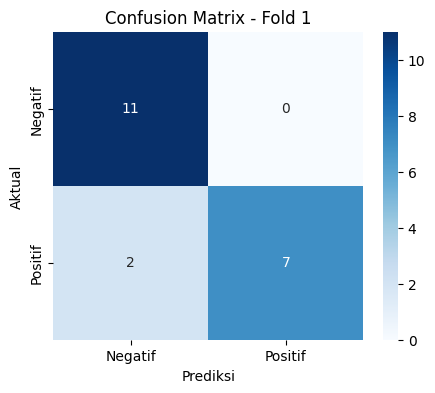

Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Specificity - Fold 2: 1.00


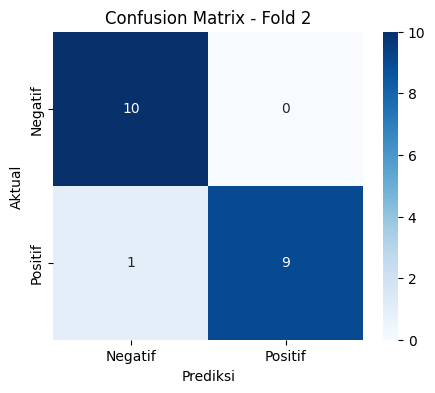

Classification Report - Fold 3:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20

Specificity - Fold 3: 1.00


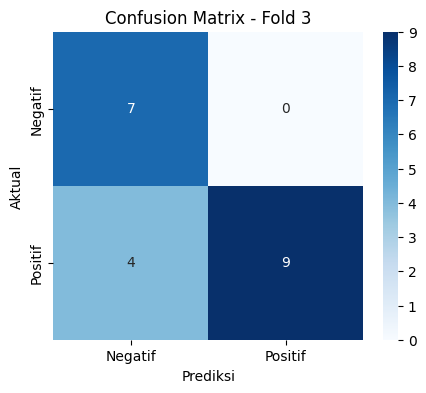

Classification Report - Fold 4:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20

Specificity - Fold 4: 1.00


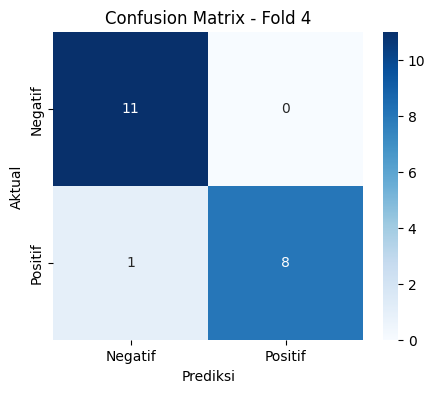

Classification Report - Fold 5:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

Specificity - Fold 5: 1.00


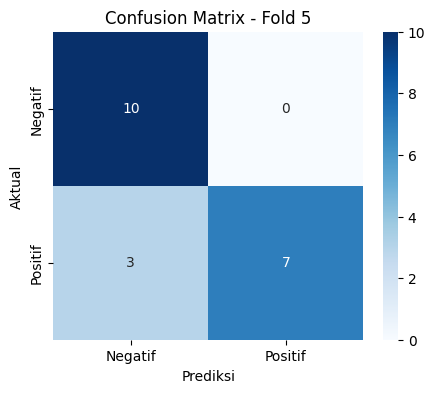

Classification Report - Fold 6:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20

Specificity - Fold 6: 1.00


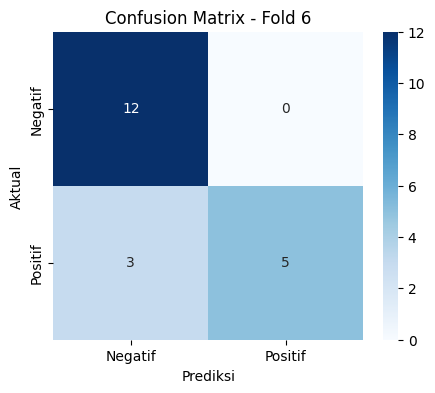

Classification Report - Fold 7:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.40      0.57        10

    accuracy                           0.70        20
   macro avg       0.81      0.70      0.67        20
weighted avg       0.81      0.70      0.67        20

Specificity - Fold 7: 1.00


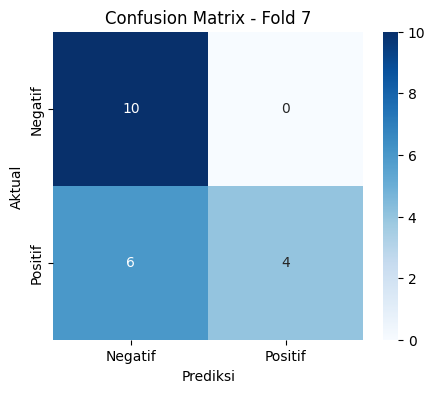

Classification Report - Fold 8:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Specificity - Fold 8: 1.00


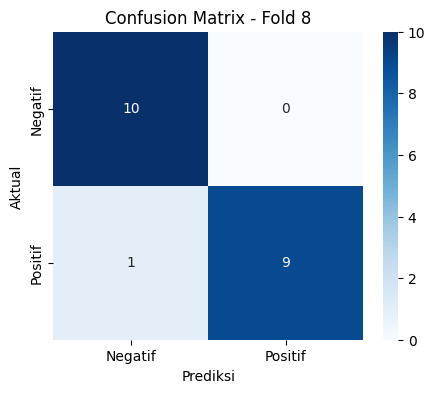

Classification Report - Fold 9:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.40      0.57        10

    accuracy                           0.70        20
   macro avg       0.81      0.70      0.67        20
weighted avg       0.81      0.70      0.67        20

Specificity - Fold 9: 1.00


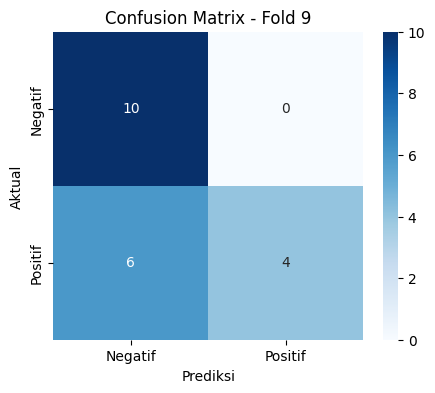

Classification Report - Fold 10:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.80      0.89        10

    accuracy                           0.89        19
   macro avg       0.91      0.90      0.89        19
weighted avg       0.91      0.89      0.89        19

Specificity - Fold 10: 1.00


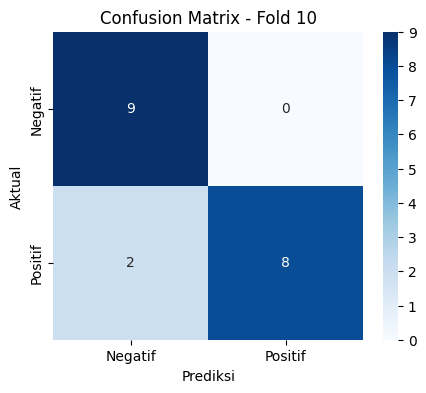

In [242]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=30)

# Gabungkan data latih dan label
x = response_train
y = y_train

# Inisialisasi objek KFold untuk 5-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=30)

# Lakukan 5-fold cross-validation
scores = cross_val_score(logistic_model, x, y, cv=kf, scoring='accuracy')

# Hitung rata-rata akurasi dari seluruh fold
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Tampilkan classification report di setiap iterasi
for i, (train_index, test_index) in enumerate(kf.split(x)):
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    logistic_model.fit(x_train_cv, y_train_cv)
    y_pred_cv_fold = logistic_model.predict(x_test_cv)

    class_report = classification_report(y_test_cv, y_pred_cv_fold)
    print(f"Classification Report - Fold {i + 1}:\n{class_report}")

    # Hitung confusion matrix
    cm = confusion_matrix(y_test_cv, y_pred_cv_fold)

    # Hitung specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity - Fold {i + 1}: {specificity:.2f}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - Fold {i + 1}')
    plt.show()

## 10-Fold Cross Validation Naive Bayes Classification

Mean Accuracy: 0.92
Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Specificity - Fold 1: 0.91


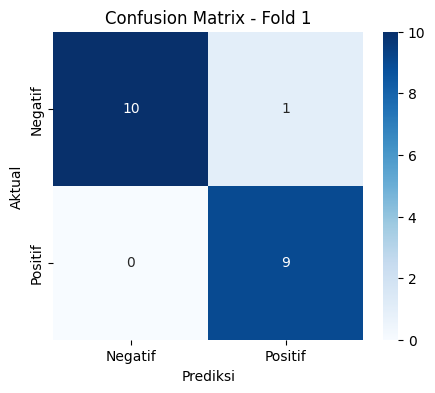

Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Specificity - Fold 2: 1.00


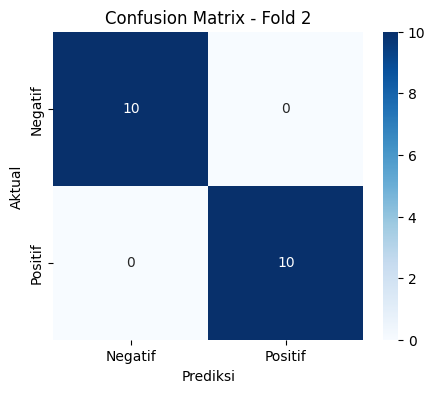

Classification Report - Fold 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Specificity - Fold 3: 1.00


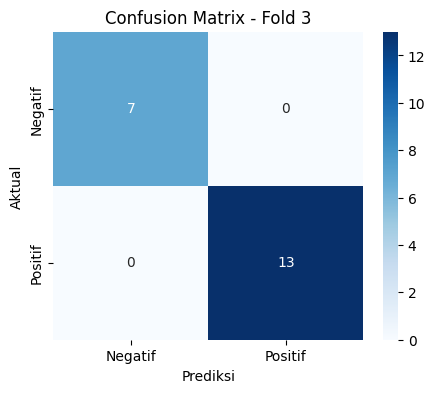

Classification Report - Fold 4:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Specificity - Fold 4: 0.91


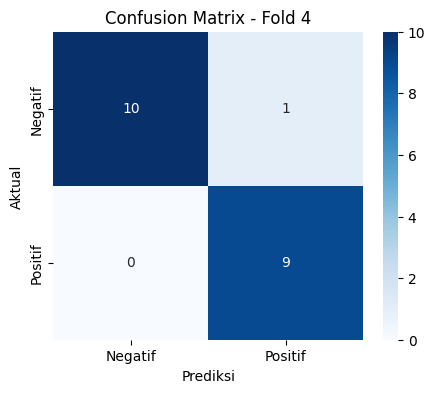

Classification Report - Fold 5:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Specificity - Fold 5: 0.90


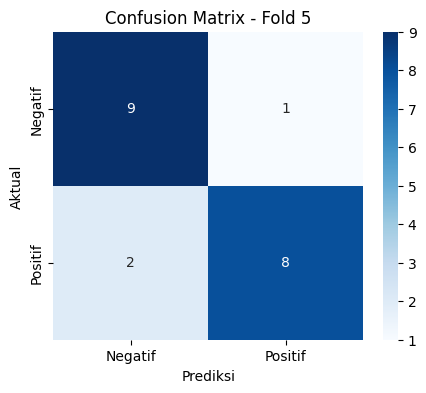

Classification Report - Fold 6:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

Specificity - Fold 6: 0.83


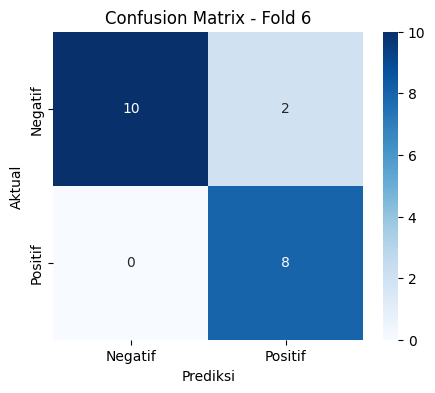

Classification Report - Fold 7:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Specificity - Fold 7: 0.90


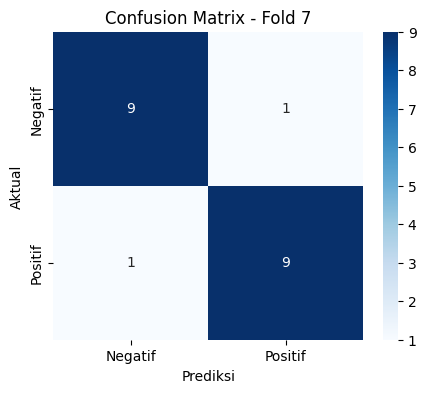

Classification Report - Fold 8:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Specificity - Fold 8: 1.00


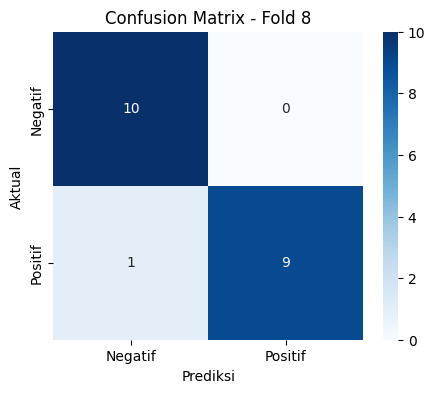

Classification Report - Fold 9:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

Specificity - Fold 9: 0.70


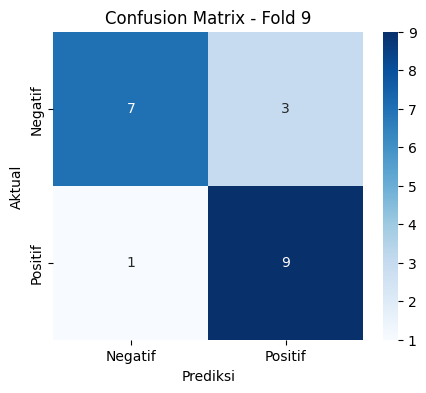

Classification Report - Fold 10:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.83      1.00      0.91        10

    accuracy                           0.89        19
   macro avg       0.92      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19

Specificity - Fold 10: 0.78


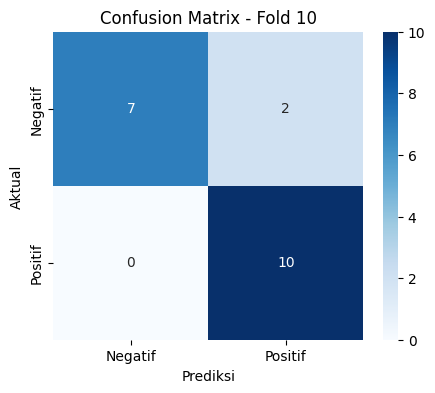

In [243]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Inisialisasi model Naïve Bayes Classifier
naive_bayes_model = MultinomialNB()

# Gabungkan data latih dan label
x = response_train
y = y_train

# Inisialisasi objek KFold untuk 5-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=30)

# Lakukan 5-fold cross-validation
scores = cross_val_score(naive_bayes_model, x, y, cv=kf, scoring='accuracy')

# Hitung rata-rata akurasi dari seluruh fold
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Tampilkan classification report di setiap iterasi
for i, (train_index, test_index) in enumerate(kf.split(x)):
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    naive_bayes_model.fit(x_train_cv, y_train_cv)
    y_pred_cv_fold = naive_bayes_model.predict(x_test_cv)

    class_report = classification_report(y_test_cv, y_pred_cv_fold)
    print(f"Classification Report - Fold {i + 1}:\n{class_report}")

    # Hitung confusion matrix
    cm = confusion_matrix(y_test_cv, y_pred_cv_fold)

    # Hitung specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity - Fold {i + 1}: {specificity:.2f}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - Fold {i + 1}')
    plt.show()

## 10-Fold Cross Validation Soft Voting Ensemble

Mean Accuracy: 0.89
Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Specificity - Fold 1: 1.00


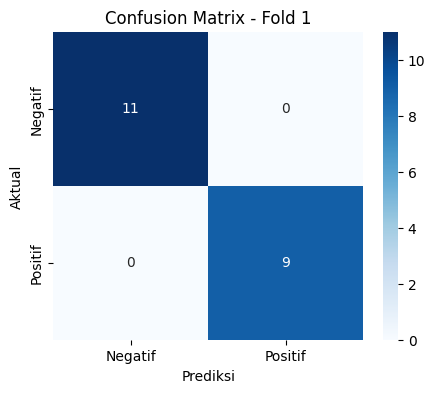

Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Specificity - Fold 2: 1.00


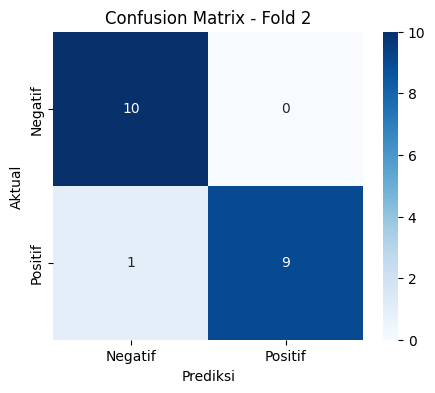

Classification Report - Fold 3:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20

Specificity - Fold 3: 1.00


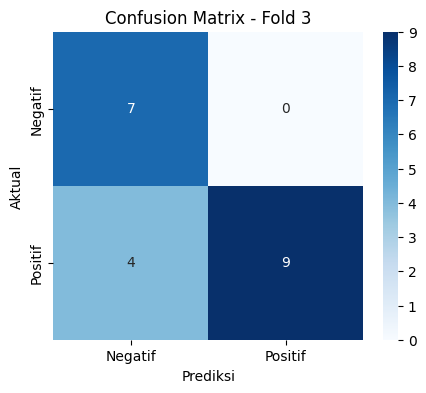

Classification Report - Fold 4:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Specificity - Fold 4: 0.91


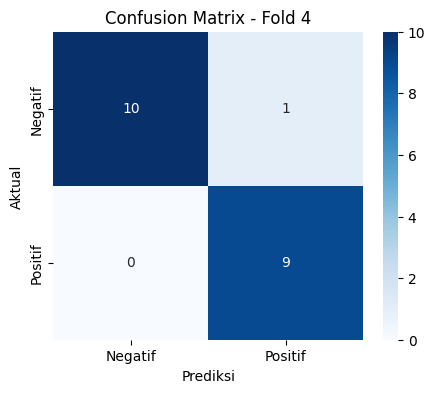

Classification Report - Fold 5:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

Specificity - Fold 5: 1.00


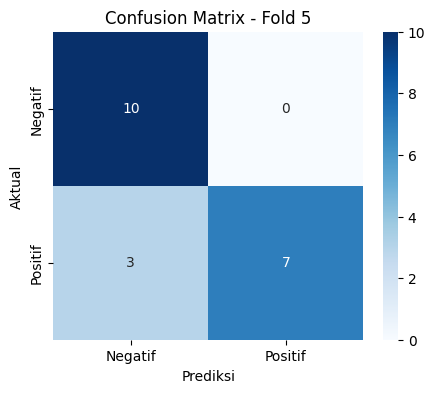

Classification Report - Fold 6:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Specificity - Fold 6: 0.92


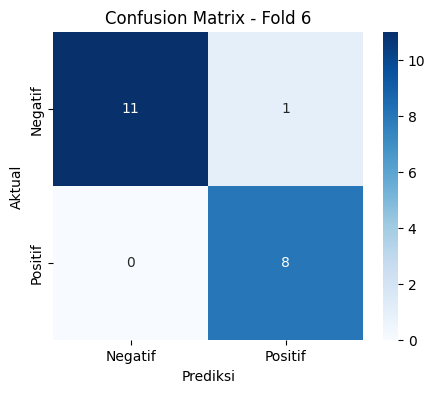

Classification Report - Fold 7:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20

Specificity - Fold 7: 1.00


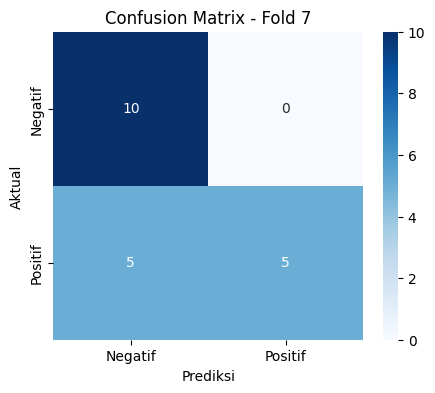

Classification Report - Fold 8:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Specificity - Fold 8: 1.00


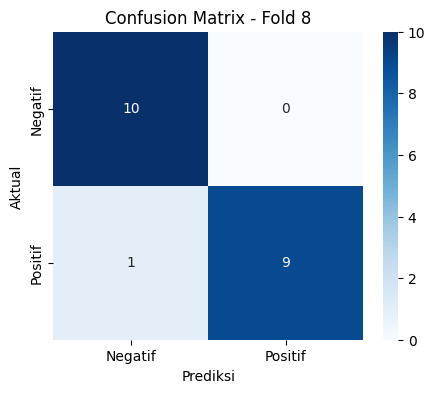

Classification Report - Fold 9:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20

Specificity - Fold 9: 0.80


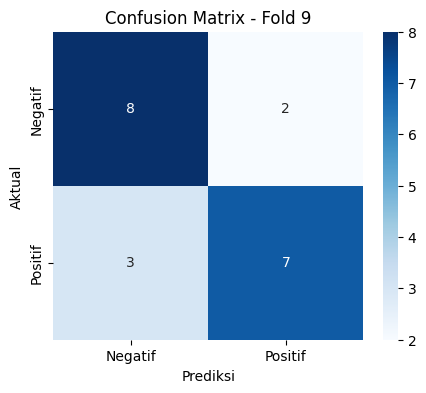

Classification Report - Fold 10:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10

    accuracy                           0.95        19
   macro avg       0.95      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19

Specificity - Fold 10: 1.00


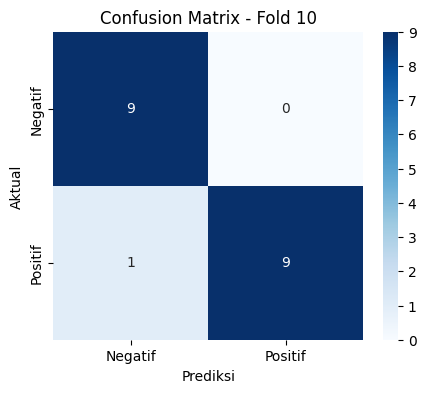

In [244]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model ensemble
ensemble_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('naive_bayes', naive_bayes_model)
], voting='soft')

# Gabungkan data latih dan label
x = response_train
y = y_train

# Inisialisasi objek KFold untuk 5-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=30)

# Lakukan 5-fold cross-validation
scores = cross_val_score(ensemble_model, x, y, cv=kf, scoring='accuracy')

# Hitung rata-rata akurasi dari seluruh fold
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Tampilkan classification report di setiap iterasi
for i, (train_index, test_index) in enumerate(kf.split(x)):
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    ensemble_model.fit(x_train_cv, y_train_cv)
    y_pred_cv_fold = ensemble_model.predict(x_test_cv)

    class_report = classification_report(y_test_cv, y_pred_cv_fold)
    print(f"Classification Report - Fold {i + 1}:\n{class_report}")

    # Hitung confusion matrix
    cm = confusion_matrix(y_test_cv, y_pred_cv_fold)

    # Hitung specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity - Fold {i + 1}: {specificity:.2f}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - Fold {i + 1}')
    plt.show()

# Confusion Matrix

## Confusion Matrix Logistic Regression

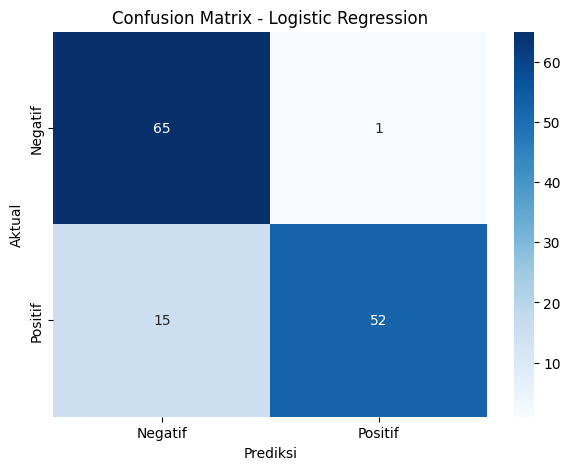

In [241]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Model logistic yang sudah Anda latih
model = logistic_model

# Melakukan prediksi pada data uji
y_pred_lr = model.predict(response_test)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test, y_pred_lr)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Confusion Matrix Naive Bayes Classification

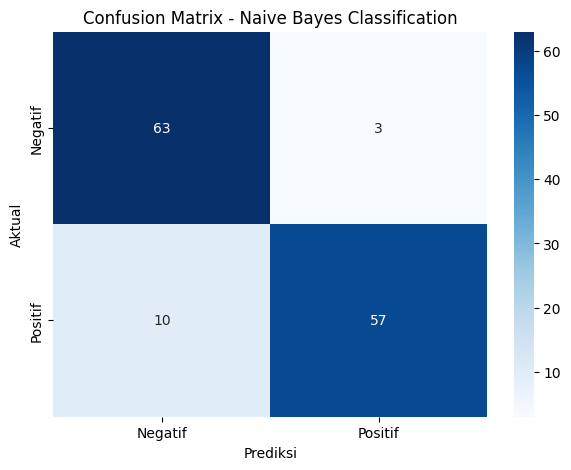

In [232]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Model ensemble yang sudah Anda latih
model = naive_bayes_model

# Melakukan prediksi pada data uji
y_pred_nb = model.predict(response_test)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test, y_pred_nb)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes Classification')
plt.show()

## Confusion Matrix Soft Voting Ensemble

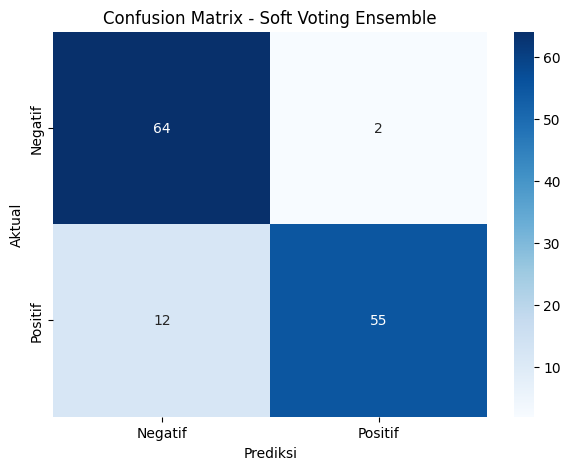

In [236]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Model ensemble yang sudah Anda latih
model = ensemble_model

# Melakukan prediksi pada data uji
y_pred_sv = model.predict(response_test)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test, y_pred_sv)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Soft Voting Ensemble')
plt.show()

# Test Ulasan Lain

In [26]:
telegram_review_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_test.csv')
print(telegram_review_test)
telegram_review_test.head()

                   date  rating  \
0   2023-11-24 10:51:05       5   
1   2023-11-18 16:54:05       2   
2   2023-11-18 10:15:46       1   
3   2023-10-19 23:57:11       1   
4   2023-10-06 11:27:48       1   
5   2023-10-03 15:51:33       1   
6   2023-09-29 20:25:43       1   
7   2023-09-02 23:11:37       4   
8   2023-01-23 12:58:27       3   
9   2022-06-23 20:05:24       2   
10  2022-06-01 11:28:15       5   
11  2022-05-30 12:59:12       5   
12  2022-05-29 10:23:34       5   
13  2022-05-20 20:15:24       3   
14   2022-05-10 8:11:01       2   
15   2022-05-08 8:59:36       4   
16   2022-05-08 8:11:46       1   
17   2022-05-05 1:53:11       1   
18  2022-04-08 19:09:07       1   
19  2022-04-08 18:27:20       1   
20  2022-04-08 13:57:42       5   
21  2022-03-16 10:00:31       5   
22   2021-10-21 2:48:58       5   
23  2021-09-22 19:15:55       5   
24  2021-01-05 15:37:43       5   
25   2020-12-16 7:45:25       5   
26   2020-10-06 1:50:12       5   
27  2020-08-09 15:01

,date,rating,review,title,userName,Label
0,2023-11-24 10:51:05,5,Lebih mudah menggunakan dan bisa juga mengirim...,Baik,Made natha,Positif
1,2023-11-18 16:54:05,2,kenapa ya di perangkat ios di bawah 17 tidak b...,TIDAK BISA BELI TELEGRAM PREMIUM,Nabil Ramadhan,Negatif
2,2023-11-18 10:15:46,1,"Lots of bug, some video cant share to telegram...",Failed send a video,Halca*Alane,Negatif
3,2023-10-19 23:57:11,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,edogawaaaa,No4h_,Negatif
4,2023-10-06 11:27:48,1,"So much restrictions in this app, there is als...",Stories,Jef_89_2001,Negatif


In [27]:
telegram_review_test.drop(columns = ['date', 'userName', 'title'], inplace = True)
telegram_review_test.columns = ['rating', 'review','Final']
telegram_review_test.head()

,rating,review,Final
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif
2,1,"Lots of bug, some video cant share to telegram...",Negatif
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif
4,1,"So much restrictions in this app, there is als...",Negatif


In [28]:
test_review = telegram_review_test['review']

# Preprocessing

In [29]:
def case_folding(text):
    #Mengubah uppercase menjadi lowercase
    text = text.lower()
    #Menghilangkan tanda baca
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    #Menghapus angka
    text = re.sub(r'\d', ' ', text)
    #Menghapus pangkat pada kalimat
    text = ''.join([i for i in text if ord(i) < 128])
    #Mengganti line baru dengan spasi
    text = re.sub("\n", " ", text)
    #Menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    #Menghapus symbol
    symbol_pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(symbol_pattern, '', text)
    #Menghapus spasi di awal dan akhir kalimat
    text = text.strip()
    #Menghapus spasi berlebih
    text = re.sub('\s+', ' ', text)
    #Menghapus Emoji
    text = demoji.replace(text, ' ')
    return text

In [30]:
telegram_review_test['clean'] = [case_folding(i) for i in test_review]
test_review = telegram_review_test['clean']
telegram_review_test.head(150)

,rating,review,Final,clean
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...
5,1,"woi gajelas, apasi telpon suka gada suaranya, ...",Negatif,woi gajelas apasi telpon suka gada suaranya bu...
6,1,"cant login,no message received when adding num...",Negatif,cant loginno message received when adding numb...
7,4,Add PiP (Picture in Picture) feature during vi...,Positif,add pip picture in picture feature during vide...
8,3,Segera perbaiki bug!\nJangan kasih fitur story...,Positif,segera perbaiki bug jangan kasih fitur story a...
9,2,"Gini aja udah bagus kok pertahankan, cukup nge...",Positif,gini aja udah bagus kok pertahankan cukup nge ...


In [31]:
from deep_translator import GoogleTranslator
# Define a function to translate text
def translate_text(text, target_language='id'):
    translated = GoogleTranslator(source='auto', target=target_language).translate(text)
    return translated

In [32]:
# Apply the translation function to the 'review' column
telegram_review_test['translated_review'] = telegram_review_test['clean'].apply(translate_text)
# Print the translated reviews
test_review = telegram_review_test['translated_review']

telegram_review_test.head(150)

,rating,review,Final,clean,translated_review
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...,kenapa ya di perangkat ios di bawah tidak bisa...
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...,banyak bug beberapa video tidak dapat dibagika...
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help,"tidak dapat membuka telegram saya, mohon bantu..."
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...,"Begitu banyak batasan dalam aplikasi ini, ada ..."
5,1,"woi gajelas, apasi telpon suka gada suaranya, ...",Negatif,woi gajelas apasi telpon suka gada suaranya bu...,woi gajelas apasi telpon suka gada suaranya bu...
6,1,"cant login,no message received when adding num...",Negatif,cant loginno message received when adding numb...,"tidak bisa masuk, tidak ada pesan yang diterim..."
7,4,Add PiP (Picture in Picture) feature during vi...,Positif,add pip picture in picture feature during vide...,tambahkan fitur gambar pip dalam gambar selama...
8,3,Segera perbaiki bug!\nJangan kasih fitur story...,Positif,segera perbaiki bug jangan kasih fitur story a...,segera perbaiki bug jangan kasih fitur story a...
9,2,"Gini aja udah bagus kok pertahankan, cukup nge...",Positif,gini aja udah bagus kok pertahankan cukup nge ...,gini aja udah bagus kok pertahankan cukup nge ...


In [33]:
# Membaca dataset dari dua file dataset
dataset = eval(open("/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/combined_slang_words.txt").read())

# Create a regular expression pattern to match keys from the dataset
pattern = re.compile(r'\b(' + '|'.join(dataset.keys()) + r')\b')

#print(pattern)

# Initialize an empty list to store the transformed words
content = telegram_review_test['translated_review']

# Iterate through each word in the input text
j = 0
for i in content:
    filter_data = pattern.sub(lambda x: dataset[x.group()], i)
    content[j] = filter_data.lower()
    j+=1

<ipython-input-33-55e714cdd2a1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content[j] = filter_data.lower()


In [34]:
telegram_review_test['formalized'] = content
test_review = telegram_review_test['formalized']

telegram_review_test.head(150)

,rating,review,Final,clean,translated_review,formalized
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat dibagika...
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help,"tidak dapat membuka telegram saya, mohon bantu...","tidak dapat membuka telegram saya, mohon bantu..."
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...,"begitu banyak batasan dalam aplikasi ini, ada ...","begitu banyak batasan dalam aplikasi ini, ada ..."
5,1,"woi gajelas, apasi telpon suka gada suaranya, ...",Negatif,woi gajelas apasi telpon suka gada suaranya bu...,woi gajelas apasi telpon suka gada suaranya bu...,woi gajelas apasi telpon suka gada suaranya bu...
6,1,"cant login,no message received when adding num...",Negatif,cant loginno message received when adding numb...,"tidak bisa masuk, tidak ada pesan yang diterim...","tidak bisa masuk, tidak ada pesan yang diterim..."
7,4,Add PiP (Picture in Picture) feature during vi...,Positif,add pip picture in picture feature during vide...,tambahkan fitur gambar pip dalam gambar selama...,tambahkan fitur gambar pip dalam gambar selama...
8,3,Segera perbaiki bug!\nJangan kasih fitur story...,Positif,segera perbaiki bug jangan kasih fitur story a...,segera perbaiki bug jangan kasih fitur story a...,segera perbaiki bug jangan kasih fitur story a...
9,2,"Gini aja udah bagus kok pertahankan, cukup nge...",Positif,gini aja udah bagus kok pertahankan cukup nge ...,gini saja sudah bagus kok pertahankan cukup ng...,gini saja sudah bagus kok pertahankan cukup ng...


In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize the Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to perform stemming using Sastrawi
def stem_text(text):
    return stemmer.stem(text)

telegram_review_test['stemmed'] = telegram_review_test['formalized'].apply(stem_text)
test_review = telegram_review_test['stemmed']

In [36]:
telegram_review_test.head()

,rating,review,Final,clean,translated_review,formalized,stemmed
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah guna dan bisa juga kirim video leb...
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat bagi ke ...
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help,"tidak dapat membuka telegram saya, mohon bantu...","tidak dapat membuka telegram saya, mohon bantu...",tidak dapat buka telegram saya mohon bantu
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...,"begitu banyak batasan dalam aplikasi ini, ada ...","begitu banyak batasan dalam aplikasi ini, ada ...",begitu banyak batas dalam aplikasi ini ada jug...


In [37]:
data_neg = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/negative.txt', 'r')
neg = data_neg.read()

data_pos = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/positive.txt', 'r')
pos = data_pos.read()

data_pos_neg = pos + neg
list_pos_neg = data_pos_neg.split('\n')

final_list = list(set(daftar_remove) - set(list_pos_neg))

stopword = telegram_review_test['stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_list)]))

In [38]:
telegram_review_test['stopword'] = stopword
test_review = telegram_review_test['stopword']

telegram_review_test.head()

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah guna dan bisa juga kirim video leb...,mudah kirim video panjang good job
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,iya perangkat ios tidak beli telegram premium ...
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat bagi ke ...,banyak bug video tidak telegram data tidak akurat
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help,"tidak dapat membuka telegram saya, mohon bantu...","tidak dapat membuka telegram saya, mohon bantu...",tidak dapat buka telegram saya mohon bantu,tidak buka telegram mohon bantu
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...,"begitu banyak batasan dalam aplikasi ini, ada ...","begitu banyak batasan dalam aplikasi ini, ada ...",begitu banyak batas dalam aplikasi ini ada jug...,banyak batas aplikasi batas buggy tidak perhat...


In [39]:
def tokenizing(text):
    words_token = text.split()
    return words_token

In [40]:
telegram_review_test['token'] = [tokenizing(i) for i in test_review]
test_review = telegram_review_test['token']

telegram_review_test.head()

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,token
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah guna dan bisa juga kirim video leb...,mudah kirim video panjang good job,"[mudah, kirim, video, panjang, good, job]"
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,iya perangkat ios tidak beli telegram premium ...,"[iya, perangkat, ios, tidak, beli, telegram, p..."
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat bagi ke ...,banyak bug video tidak telegram data tidak akurat,"[banyak, bug, video, tidak, telegram, data, ti..."
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help,"tidak dapat membuka telegram saya, mohon bantu...","tidak dapat membuka telegram saya, mohon bantu...",tidak dapat buka telegram saya mohon bantu,tidak buka telegram mohon bantu,"[tidak, buka, telegram, mohon, bantu]"
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...,"begitu banyak batasan dalam aplikasi ini, ada ...","begitu banyak batasan dalam aplikasi ini, ada ...",begitu banyak batas dalam aplikasi ini ada jug...,banyak batas aplikasi batas buggy tidak perhat...,"[banyak, batas, aplikasi, batas, buggy, tidak,..."


In [41]:
# Fungsi untuk konversi nilai kolom 'Final' menjadi 1 untuk positif dan 0 untuk negatif
def convert_final_to_binary(final_value):
    return 1 if final_value == 'Positif' else 0

# Menambahkan kolom baru 'label_binary' berdasarkan konversi 'Final'
telegram_review_test['label_binary'] = telegram_review_test['Final'].apply(lambda x: convert_final_to_binary(x))

# Menampilkan DataFrame
telegram_review_test.head()


,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,token,label_binary
0,5,Lebih mudah menggunakan dan bisa juga mengirim...,Positif,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah menggunakan dan bisa juga mengirim...,lebih mudah guna dan bisa juga kirim video leb...,mudah kirim video panjang good job,"[mudah, kirim, video, panjang, good, job]",1
1,2,kenapa ya di perangkat ios di bawah 17 tidak b...,Negatif,kenapa ya di perangkat ios di bawah tidak bisa...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,kenapa iya di perangkat ios di bawah tidak bis...,iya perangkat ios tidak beli telegram premium ...,"[iya, perangkat, ios, tidak, beli, telegram, p...",0
2,1,"Lots of bug, some video cant share to telegram...",Negatif,lots of bug some video cant share to telegram ...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat dibagika...,banyak bug beberapa video tidak dapat bagi ke ...,banyak bug video tidak telegram data tidak akurat,"[banyak, bug, video, tidak, telegram, data, ti...",0
3,1,I CAN’T OPEN MY TELEGRAM PLEASE HELP.,Negatif,cant open my telegram please help,"tidak dapat membuka telegram saya, mohon bantu...","tidak dapat membuka telegram saya, mohon bantu...",tidak dapat buka telegram saya mohon bantu,tidak buka telegram mohon bantu,"[tidak, buka, telegram, mohon, bantu]",0
4,1,"So much restrictions in this app, there is als...",Negatif,so much restrictions in this app there is also...,"begitu banyak batasan dalam aplikasi ini, ada ...","begitu banyak batasan dalam aplikasi ini, ada ...",begitu banyak batas dalam aplikasi ini ada jug...,banyak batas aplikasi batas buggy tidak perhat...,"[banyak, batas, aplikasi, batas, buggy, tidak,...",0


# Pelatihan Model

## Logistic Regression


In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Memprediksi label data uji
y_pred_lr = logistic_model.predict(response_test2)

# Menghitung akurasi model
accuracy = accuracy_score(y_test2, y_pred_lr)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test2, y_pred_lr)
print("Laporan Klasifikasi:\n", class_report)

# Manual calculation of specificity
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred_lr).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Akurasi model: 0.67
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        15
           1       1.00      0.33      0.50        15

    accuracy                           0.67        30
   macro avg       0.80      0.67      0.62        30
weighted avg       0.80      0.67      0.62        30

Specificity: 1.00


## Naive Bayes

In [233]:
# Memprediksi label data uji
y_pred_nb = naive_bayes_model.predict(response_test2)

# Menghitung akurasi model
accuracy = accuracy_score(y_test2, y_pred_nb)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test2, y_pred_nb)
print("Laporan Klasifikasi:\n", class_report)

# Manual calculation of specificity
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred_nb).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Akurasi model: 0.80
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

Specificity: 0.87


## Soft Voting Ensemble

In [237]:
# Memprediksi label data uji menggunakan ensemble model
y_pred_sv = ensemble_model.predict(response_test2)

# Menghitung akurasi model
accuracy = accuracy_score(y_test2, y_pred_sv)
print(f"Akurasi model: {accuracy:.2f}")

# Melihat laporan klasifikasi
class_report = classification_report(y_test2, y_pred_sv)
print("Laporan Klasifikasi:\n", class_report)

# Manual calculation of specificity
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred_sv).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Akurasi model: 0.67
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.86      0.40      0.55        15

    accuracy                           0.67        30
   macro avg       0.73      0.67      0.64        30
weighted avg       0.73      0.67      0.64        30

Specificity: 0.93


# Confusion Matrix

## Confusion Matrix Logistic Regression

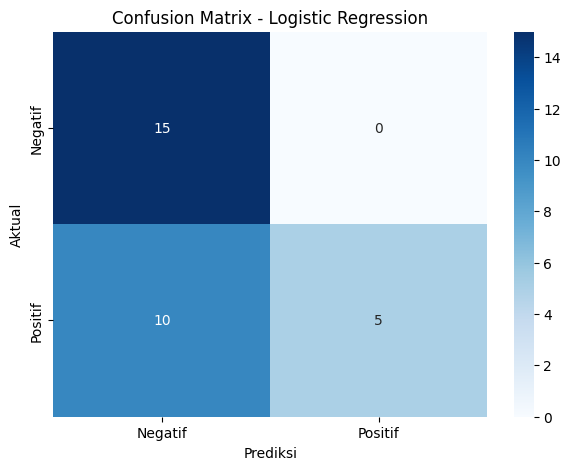

In [230]:
# Melakukan prediksi pada data uji
y_pred_lr = model.predict(response_test2)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test2, y_pred_lr)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Confusion Matrix Naive Bayes Classification

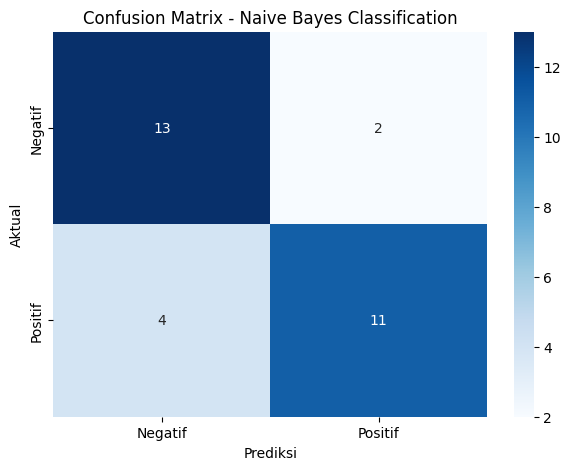

In [234]:
# Melakukan prediksi pada data uji
y_pred_nb = model.predict(response_test2)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test2, y_pred_nb)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes Classification')
plt.show()

## Confusion Matrix Soft Voting Ensemble

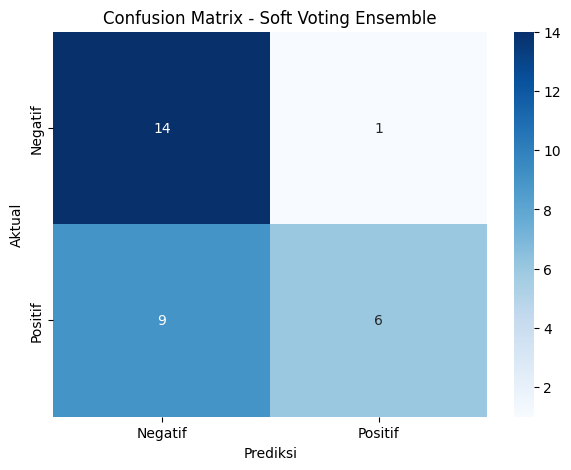

In [238]:
# Melakukan prediksi pada data uji
y_pred_sv = model.predict(response_test2)

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test2, y_pred_sv)

# Mencetak matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Soft Voting Ensemble')
plt.show()